<a href="https://colab.research.google.com/github/ZSCode768/Machine-Learning-Project/blob/main/Surlow_EDA_Project_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modeling Notebook
This notebook focuses on building a predictive model to analyze helpfulness in game reviews.

This notebook:
1. Prepares the data for modeling.
2. Train and evaluate models.
3. Analyze results and discuss limitations.

In [2]:
# Import necessary libraries.
import csv
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.impute import SimpleImputer

from google.colab import drive
drive.mount("/content/drive")

# Load the Dataset
file_path = '/content/drive/My Drive/datasets/game_recs/recommendations.csv'
df = pd.read_csv(file_path, delimiter=',', on_bad_lines='skip')

# Display first few rows and dataset info
print("Dataset Shape:", df.shape)
display(df)

print("Columns in the dataset:")
print(df.dtypes)

print("Columns List:")
print(df.columns)

print("Summary Statistics")
display(df.describe())

print("Categorical Column Insights:")
for col in df.select_dtypes(include='object').columns:
  print(f"\nColumn: {col}")
  print(df[col].value_counts())

Mounted at /content/drive


<ipython-input-2-cdefe92f96ea>:15: DtypeWarning: Columns (0,1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=',', on_bad_lines='skip')


Dataset Shape: (3513134, 8)


,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0.0,2022-12-12,True,36.3,51580.0,0.0
1,304390,4,0.0,2017-02-17,False,11.5,2586.0,1.0
2,1085660,2,0.0,2019-11-17,True,336.5,253880.0,2.0
3,703080,0,0.0,2022-09-23,True,27.4,259432.0,3.0
4,526870,0,0.0,2021-01-10,True,7.9,23869.0,4.0
...,...,...,...,...,...,...,...,...
3513129,578080,0,0.0,2017-11-22,True,94.6,5849820.0,1200387.0
3513130,376210,0,0.0,2021-06-08,True,363.2,5861317.0,1200388.0
3513131,218620,0,0.0,2019-11-08,True,34.9,6066643.0,1200389.0
3513132,289070,0,0.0,2021-09-09,True,196.1,6452646.0,1200390.0


Columns in the dataset:
app_id             object
helpful            object
funny             float64
date               object
is_recommended     object
hours             float64
user_id           float64
review_id         float64
dtype: object
Columns List:
Index(['app_id', 'helpful', 'funny', 'date', 'is_recommended', 'hours',
       'user_id', 'review_id'],
      dtype='object')
Summary Statistics


,funny,hours,user_id,review_id
count,3.513124e+06,3.513110e+06,3.513104e+06,3.513095e+06
mean,1.503962e+00,2.024429e+02,7.280668e+06,6.005821e+05
std,4.812376e+02,1.074025e+03,4.175900e+06,3.382727e+05
min,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00
25%,0.000000e+00,3.100000e+01,3.851423e+06,3.078160e+05
50%,0.000000e+00,1.003000e+02,7.222203e+06,6.005830e+05
75%,0.000000e+00,2.848000e+02,1.110101e+07,8.933485e+05
max,6.362570e+05,1.136152e+06,1.153374e+09,8.767845e+06


Categorical Column Insights:

Column: app_id
app_id
252490           138914
730               95544
275850            82526
431960            82423
271590            81524
                  ...  
12866855              2
1248131-07-14         2
1942280               2
3733                  2
2013360               1
Name: count, Length: 423, dtype: int64

Column: helpful
helpful
0       2697020
2        324965
3        121854
0        104648
4         57537
         ...   
1938          1
1494          1
747           1
779           1
864           1
Name: count, Length: 1580, dtype: int64

Column: date
date
2022-11-22    19389
2022-11-23    17128
2022-11-24    12438
2019-06-29    12190
2020-11-25    11238
              ...  
2011-10-02        1
2013-01-29        1
2013-02-23        1
2011-04-17        1
2011-03-04        1
Name: count, Length: 4102, dtype: int64

Column: is_recommended
is_recommended
True        2303674
true         664823
False        423012
false        121595
true78

Create Feature and target variables

## Feature and Target Variables
The dataset contains the following:
- Features: is_recommended, hours. (Whether or not the review recommends the game, and number of hours the user played the game)
- Target: 'helpful' is the target variable.  This variable measures the amount of votes a review gets labeled as helpful.

In [3]:
# Check for missing values
print("Missing values")
print(df.isnull().sum())

# Dropping missing values
df = df.dropna()

print("\nMissing values")
print(df.isnull().sum())

# Check for duplicate values
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Dropping missing values
df = df.drop_duplicates()

print(f"Number of duplicate rows after drop: {df.duplicated().sum()}")

print("Dataset Shape After Removing Duplicates:", df.shape)

Missing values
app_id             0
helpful            2
funny             10
date              12
is_recommended    16
hours             24
user_id           30
review_id         39
dtype: int64

Missing values
app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64
Number of duplicate rows: 2118686
Number of duplicate rows after drop: 0
Dataset Shape After Removing Duplicates: (1394409, 8)


In [4]:
# Standardize helpful values to eliminate data corruption and create binary value of review being helpful or not helpful
df['helpful'] = pd.to_numeric(df['helpful'], errors='coerce')
df =  df.dropna(subset=['helpful'])
df['helpful_binary'] =  df['helpful'].apply(lambda x: 1 if x > 0 else 0)
df['helpful_binary'] =  df['helpful_binary'].replace({1: 'helpful', 0: 'not_helpful'})

X = df[['hours', 'is_recommended']].copy()
y = df['helpful_binary'] #For classification

# Ensure is_recommended is numeric
print(df['is_recommended'].unique())

# Map all values to numeric: True = 1, False = 0
X['is_recommended'] = X['is_recommended'].map({True: 1, False: 0})

# Fill any unexpected or missing values with a default (e.g., 0)
X['is_recommended'] = X['is_recommended'].fillna(0)

print(X['is_recommended'].describe())  # Check for valid data


[True False 'true' 'false']
count    1.394409e+06
mean     6.208085e-01
std      4.851860e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: is_recommended, dtype: float64


###Training the Model
The dataset will be split into training and testing sets, and evaluates multiple models to determine the best-performing one. This includes:
- Data preprocessing and feature engineering.
- Model selection and training.
- Model evaluation using accuracy and other relevant metrics.

##Train-Test Split
To evaluate the model performance, the dataset is split into training and test subsets.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')

#Impute missing values
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

## Scaling Data
By scaling the data, it ensures that all features are contributing equally.  
- **Method Used:** StandardScaler (scales data to have zero mean and unit variance).
- **Reason:** This ensures features are on comparable scales without causing distortions in the relationships between data points.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Classification Model
A Classification model is used since 'helpful' is a binary value as a review is either helpful or not.
- **Model:** K-Nearest Neighbors (KNN)
  - **Why KNN?** KNN is a simple and effective for relationships in smaller datasets, making it a decent base model.
  - **Key Parameters:** Number of neighbors ('k') and distance metric.

In [7]:
# Initialize KNN classifier with n_neighbors=5
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

## Predictions
The trained model is used to predict the helpfulness classification for the test data. Predictions are compared with the actual labels to assess the model's performance using the chosen evaluation metrics.

In [8]:
y_pred = knn_clf.predict(X_test)

## Model Evaluation
To measure the performance of the classification model, the following metrics are displayed:
- **Accuracy:** Measures the percentage of correct predictions.
- **Precision and Recall:** Provide insights into the model's ability to correctly classify positive and negative samples.
- **Confusion Matrix:** Visualizes the distribution of true positives, false positives, true negatives, and false negatives.

In [9]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.76
              precision    recall  f1-score   support

     helpful       0.27      0.10      0.14     56438
 not_helpful       0.80      0.93      0.86    222444

    accuracy                           0.76    278882
   macro avg       0.54      0.52      0.50    278882
weighted avg       0.69      0.76      0.72    278882



Based on the data the model correctly classifies 76% percent of the time.

## Hyperparameter Tuning

To optimize the model's performance, the key parameters are tuned using HalvingGridSearchCV.
- **Reason for Sampling:** Due to the dataset size, sampling was required for model optimization.
- **Goal**: Identify the best parameter values for the KNN model.

In [10]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


# Define hyperparameter grid
param_grid = {'n_neighbors': [3, 5, 7]}

#For classification
grid_clf = HalvingGridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, verbose=3)
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)
grid_clf.fit(X_train_sample, y_train_sample)

print(f"Best n_neighbors for classification: {grid_clf.best_params_['n_neighbors']}")

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 37184
max_resources_: 111552
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3
n_resources: 37184
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 1
n_candidates: 1
n_resources: 111552
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best n_neighbors for classification: 7


## Best Model Evaluation
The best-performing model from the hyperparameter tuning process is further evaluated to ensure generalizability. Metrics used include:
- **Accuracy, Precision, Recall:** Measure predictive performance.
- **Confusion Matrix and Permutation Importance:** Provide detailed insights into model behavior and feature significance.

In [11]:
# Best model from HalvingGridSearchCV
best_knn_clf = grid_clf.best_estimator_

# Predictions on the test set
y_pred = best_knn_clf.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7715162685293422
              precision    recall  f1-score   support

     helpful       0.27      0.08      0.12     56438
 not_helpful       0.80      0.95      0.87    222444

    accuracy                           0.77    278882
   macro avg       0.54      0.51      0.49    278882
weighted avg       0.69      0.77      0.72    278882



With the best model, the accuracy is bumped up to 77%.

### Confusion Matrix

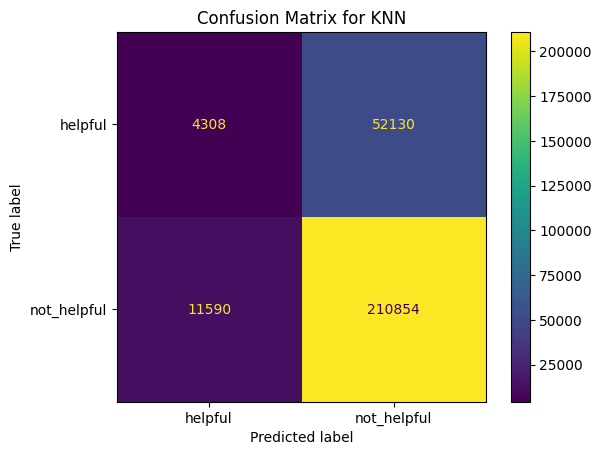

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=['helpful', 'not_helpful'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['helpful', 'not_helpful'])
disp.plot()
plt.title("Confusion Matrix for KNN")
plt.show()

Based on the Confusion Matrix, the model is highly biased toward predicting the "not helpful" class.  We can see this with the 11,590 false negatives.  This is due to the class imbalance containing more "not helpful" reviews compared to "helpful" ones.

## Permutation Importance
Permutation importance measures the significance of each feature by shuffling its values and observing the impact on the model's performance

In [13]:
from sklearn.inspection import permutation_importance
X_test_sample, _, y_test_sample, _ = train_test_split(X_test, y_test, test_size=0.1, random_state=42)
result = permutation_importance(best_knn_clf, X_test_sample, y_test_sample, n_repeats=10, random_state=42)
for i in result.importances_mean.argsort()[::-1]:
    print(f"{X.columns[i]}: {result.importances_mean[i]:.4f}")

is_recommended: 0.0044
hours: 0.0019


## Model with Cross-Validation

In [14]:
from sklearn.model_selection import cross_val_score

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
y = y.fillna('not_helpful')

scores = cross_val_score(best_knn_clf, X, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy:", scores.mean())

Cross-validated accuracy: 0.7515133579452582


###Save the Model

In [15]:
import joblib
joblib.dump(best_knn_clf, "knn_model.pkl")

['knn_model.pkl']

## Trying Random Forest
Key reasons for selecting Random Forest:
- It can handle imbalanced datasets better using the `class_weight` parameter.
- It often provides better feature importance insights compared to simpler models.

In [16]:
#Import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize with balanced weights
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the Model
rf_clf.fit(X_train, y_train)

# Make Prediction
rf_y_pred = rf_clf.predict(X_test)

# Performance Evaluation
print("Random Forest Model Evaluation")
print(f"Accuracy: {accuracy_score(y_test, rf_y_pred):.2f}")
print(classification_report(y_test, rf_y_pred))

Random Forest Model Evaluation
Accuracy: 0.60
              precision    recall  f1-score   support

     helpful       0.26      0.55      0.36     56438
 not_helpful       0.84      0.61      0.71    222444

    accuracy                           0.60    278882
   macro avg       0.55      0.58      0.53    278882
weighted avg       0.72      0.60      0.64    278882



## RF Visualization

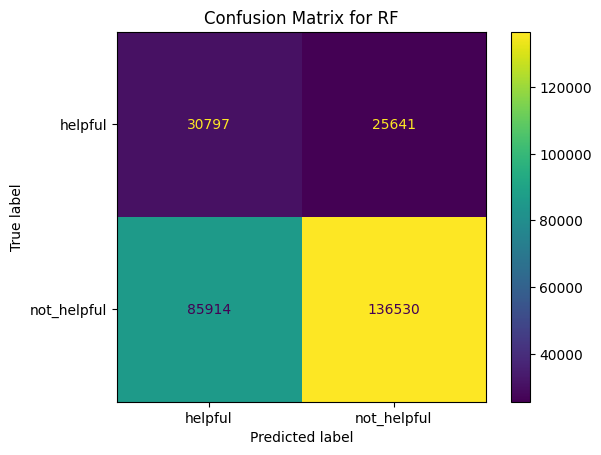

In [18]:
rf_cm = confusion_matrix(y_test, rf_y_pred, labels=['helpful', 'not_helpful'])
disp2 = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=['helpful', 'not_helpful'])
disp2.plot()
plt.title("Confusion Matrix for RF")
plt.show()

## Model Comparison: KNN vs. Random Forest
The table below summarizes the performance of the two models based on key metrics:

| Metric            | KNN              | Random Forest   |
|--------------------|------------------|-----------------|
| Accuracy          | 76%           | 60%    |
| Helpful Precision | 27%              | 26%    |
| Helpful Recall    | 8%              | 55%    |
| Helpful F1-Score  | 12%              | 36%    |

Overall Random Forest performed significantly worse than K-Nearest Neighbor.  Accuracy fell by 16%, but it was more successful in determining the helpful reviews.


## Summary

Overall, using both K-Nearest Neighbor and Random Forest revealed that Random Forest was a worse choice for modeling this dataset despite the fact that it should handle the imbalanced datasets better.  In the future, other classification models should be tested with the dataset.  Another issue, is seeing if game length could be accounted for in the data.